In [122]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn


In [123]:
#Importing the data
df_credit = pd.read_csv("german.csv")

def convertSex(age_cat):
    if age_cat == 'A91' or age_cat =="A94" or age_cat =='A93':
        return 'male'
    else:
        return'female'

df_credit['Sex_cat'] = df_credit['Sex'].apply(convertSex)
df_credit.loc[:,['Sex_cat','Sex']]

,Sex_cat,Sex
0,male,A93
1,female,A92
2,male,A93
3,male,A93
4,male,A93
...,...,...
995,female,A92
996,male,A91
997,male,A93
998,male,A93


In [124]:
#seperate age group
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)

df_credit.loc[:,["Age","Age_cat"]]

,Age,Age_cat
0,67,Senior
1,22,Student
2,49,Adult
3,45,Adult
4,53,Adult
...,...,...
995,31,Young
996,40,Adult
997,38,Adult
998,23,Student


#### load data

In [125]:
#Searching for Missings,type of data and also known the shape of data
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Checking_account   1000 non-null   object  
 1   duration           1000 non-null   int64   
 2   credit_history     1000 non-null   object  
 3   purpose            1000 non-null   object  
 4   credit_amount      1000 non-null   int64   
 5   savings_account    1000 non-null   object  
 6   employment_years   1000 non-null   object  
 7   installment_rate   1000 non-null   int64   
 8   Sex                1000 non-null   object  
 9   gurantors          1000 non-null   object  
 10  residence          1000 non-null   int64   
 11  Property           1000 non-null   object  
 12  Age                1000 non-null   int64   
 13  Installment_plans  1000 non-null   object  
 14  housing            1000 non-null   object  
 15  Existing_credits   1000 non-null   int64   
 16  job    

### Three fairness measures 


#### 1. Anti classifications

In [126]:
#create test data with swaped sex

#df_sex_test is the original data
#df_sex_test1 is the the data which changed its sex
df_sex_test = df_credit.groupby('Sex_cat').head(100).reset_index(drop=True)
df_sex_test = df_sex_test.sort_values(by=['Sex_cat']).reset_index(drop=True)

df_sex_test1 =df_sex_test.copy()
df_sex_test1['Sex_cat'] = df_sex_test1['Sex_cat'].apply(lambda x: 'male' if x == 'female' else 'female')
df_sex_test1

,Checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment_years,installment_rate,Sex,gurantors,...,Installment_plans,housing,Existing_credits,job,Maintainance,telephone,foreign_worker,Risk,Sex_cat,Age_cat
0,A11,15,A32,A44,1275,A65,A73,4,A92,A101,...,A143,A151,1,A173,1,A191,A201,2,male,Student
1,A14,12,A34,A40,682,A62,A74,4,A92,A101,...,A143,A152,2,A173,1,A192,A201,1,male,Adult
2,A12,24,A34,A41,7758,A64,A75,2,A92,A101,...,A143,A151,1,A173,1,A191,A201,1,male,Young
3,A14,36,A32,A41,8133,A61,A73,1,A92,A101,...,A141,A152,1,A173,1,A191,A201,1,male,Young
4,A14,36,A32,A43,2394,A65,A73,4,A92,A101,...,A143,A152,1,A173,1,A191,A201,1,male,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,A14,54,A30,A41,9436,A65,A73,2,A93,A101,...,A143,A152,1,A172,2,A191,A201,1,female,Adult
196,A12,30,A32,A42,3832,A61,A72,2,A94,A101,...,A143,A152,1,A173,1,A191,A201,1,female,Student
197,A14,15,A32,A43,1213,A63,A75,4,A93,A101,...,A142,A152,1,A173,1,A192,A201,1,female,Adult
198,A12,36,A32,A46,12612,A62,A73,1,A93,A101,...,A143,A153,1,A173,2,A192,A201,2,female,Adult


In [127]:
#create test data with swaped age

#df_age_test is the original data
#df_age_test1 is the the data which changed its age
df_age_test = df_credit.groupby('Age_cat').head(80).reset_index(drop=True)
df_age_test = df_age_test.sort_values(by=['Age_cat']).reset_index(drop=True)

df_age_test1 =df_age_test.copy()

def changeAgeCategory(age_cat):
    if age_cat == 'Student':
        return 'Young'
    if age_cat =='Young':
        return'Adult'
    if age_cat =="Adult":
        return 'Senior'
    if age_cat=='Senior':
        return 'Student'

df_age_test1['Age_cat'] = df_age_test1['Age_cat'].apply(changeAgeCategory)
df_age_test1

,Checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment_years,installment_rate,Sex,gurantors,...,Installment_plans,housing,Existing_credits,job,Maintainance,telephone,foreign_worker,Risk,Sex_cat,Age_cat
0,A12,48,A32,A40,8487,A65,A74,1,A92,A101,...,A143,A152,1,A173,1,A191,A201,1,female,Young
1,A11,36,A34,A42,6229,A61,A72,4,A92,A102,...,A143,A151,2,A172,1,A192,A201,2,female,Young
2,A11,21,A32,A43,1835,A61,A73,3,A92,A101,...,A143,A152,2,A173,1,A192,A201,2,female,Young
3,A11,12,A32,A48,902,A61,A74,4,A94,A101,...,A143,A151,1,A173,1,A191,A201,2,male,Young
4,A11,24,A32,A49,6568,A61,A73,2,A94,A101,...,A142,A152,1,A172,1,A191,A201,1,male,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A143,A153,1,A173,1,A191,A201,1,male,Student
281,A14,60,A34,A40,13756,A65,A75,2,A93,A101,...,A141,A153,1,A174,1,A192,A201,1,male,Student
282,A14,5,A32,A49,3448,A61,A74,1,A93,A101,...,A143,A152,1,A172,1,A191,A201,1,male,Student
283,A12,9,A31,A41,5129,A61,A75,2,A92,A101,...,A141,A153,1,A174,2,A192,A201,2,female,Student


In [145]:
import pickle
# load the model
model = pickle.load(open("model.pkl", "rb"))


# use model to predict
df_age_test=df_age_test.iloc[:,:20]
y_pred_age_test = model.predict(df_age_test)

df_age_test1=df_age_test1.iloc[:,:20]
y_pred_age_test1 = model.predict(df_age_test1)

df = pd.DataFrame()
df['same_age_result']=y_pred_age_test==y_pred_age_test1
df[df['same_age_result']== False]



    Checking_account  duration credit_history purpose  credit_amount  \
0                A12        48            A32     A40           8487   
1                A11        36            A34     A42           6229   
2                A11        21            A32     A43           1835   
3                A11        12            A32     A48            902   
4                A11        24            A32     A49           6568   
..               ...       ...            ...     ...            ...   
280              A12        18            A32     A46           1239   
281              A14        60            A34     A40          13756   
282              A14         5            A32     A49           3448   
283              A12         9            A31     A41           5129   
284              A14        13            A32     A43           1409   

    savings_account employment_years  installment_rate  Sex gurantors  \
0               A65              A74                 1  A92   

/Users/cc/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but OneHotEncoder was fitted without feature names

/Users/cc/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/Users/cc/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but OneHotEncoder was fitted without feature names

/Users/cc/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



,same_age_result


In [128]:
# to make predictions based on test data , and test1 data and to see if there's any change

#check the precision afterwords

# if it is different, we shall compare the acceptance rate of each group.
sex_rate_original = get_sex_acceptance_rate(df_sex_test)
sex_rate_new = get_sex_acceptance_rate(df_sex_test1)

age_rate_original =get_age_acceptance_rate(df_age_test)
age_rate_new = get_age_acceptance_rate(df_age_test1)
print(sex_rate_original,sex_rate_new,age_rate_original,age_rate_new)

female    0.67
male      0.78
Name: Sex_cat, dtype: float64 female    0.78
male      0.67
Name: Sex_cat, dtype: float64 Age_cat
Student   NaN
Young     NaN
Adult     NaN
Senior    NaN
Name: Risk, dtype: float64 Age_cat
Young     NaN
Adult     NaN
Senior    NaN
Student   NaN
Name: Risk, dtype: float64


#### 2. group fainess

##### 2.1 evaluate fairness between different age groups

In [129]:
def get_age_acceptance_rate(df_credit):
    df_good = df_credit.loc[df_credit["Risk"] == 0].groupby('Age_cat').count()
    df_good['Risk']
    df_bad = df_credit.loc[df_credit["Risk"] == 1].groupby('Age_cat').count()
    df_bad['Risk']
    age_acceptance_rate = df_good['Risk']/(df_bad['Risk']+df_good['Risk'])
    return age_acceptance_rate

age_acceptance_rate = get_age_acceptance_rate(df_credit)

between different age group, the acceptance ratio varies a lot. Seniors have the highest acceptance rate.

/Users/cc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/cc/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:905: RuntimeWarning:

invalid value encountered in true_divide



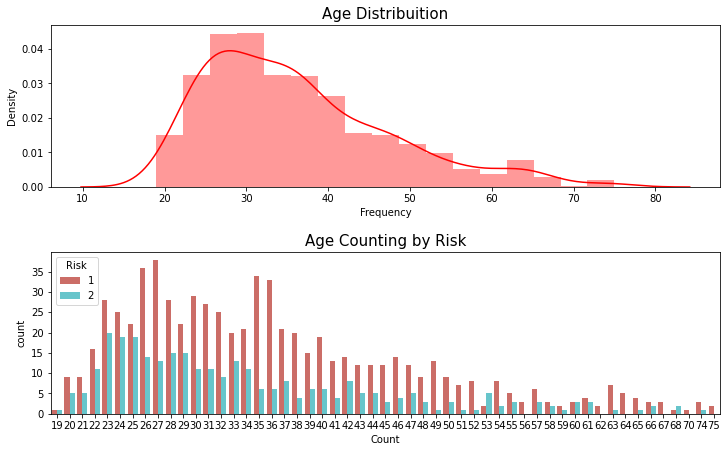

In [130]:
df_good = df_credit[df_credit["Risk"] == 0]
df_bad = df_credit[df_credit["Risk"] == 1]

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0],
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0],
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df_credit,
              palette="hls", ax=ax[1],
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

In [131]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

##### 2.2 evaluate fairness between different sex groups

In [133]:
def get_sex_acceptance_rate(df_credit):
    y1 = df_credit[df_credit["Risk"]== 1]["Sex_cat"].value_counts()
    y2 = df_credit[df_credit["Risk"]== 2]["Sex_cat"].value_counts()
    sex_acceptance_rate =y1/(y1+y2)
    return sex_acceptance_rate

sex_acceptance_rate = get_sex_acceptance_rate(df_credit)
sex_acceptance_rate

male      0.723188
female    0.648387
Name: Sex_cat, dtype: float64

#### 3. Calculate FP and FN 

#seperate user group of

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
>>> y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
>>> y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
>>> confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In the binary case, we can extract true positives, etc as follows:

>>>
>>> tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
>>> (tn, fp, fn, tp)
(0, 2, 1, 1)

[2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 1 1 1 2 1 1 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 1 2 1
 2 2 1 1 2 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 1 2 2 1 2 2 1 1 2 2 2 2 1 2 2 2
 2 2 1 2 1 2 2 2 2 2 1 2 2 2 1 2 2 1 1 2 2 1 1 2 2 2 2 2 2 1 1 1 2 2 2 2 2
 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 2 2 1 2 1 2 2 2 1 1
 1 2 1 2 1 2 1 1 2 1 2 2 2 1 1 2 2 2 1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 2 1 2 2
 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 2 2 2 1 2 2 1 1 2 1 1 2 1 1 2 2 1 1 2 2 2 1
 1 1 1 2 1 2 2 1 1 1 1 1 2 2 1 2 2 1 2 1 1 2 2 1 2 1]
[2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 1 1 1 2 1 1 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 1 2 1
 2 2 1 1 2 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 1 2 2 1 2 2 1 1 2 2 2 2 1 2 2 2
 2 2 1 2 1 2 2 2 2 2 1 2 2 2 1 2 2 1 1 2 2 1 1 2 2 2 2 2 2 1 1 1 2 2 2 2 2
 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 2 2 1 2 1 2 2 2 1 1
 1 2 1 2 1 2 1 1 2 1 2 2 2 1 1 2 2 2 1 1 1 2 2

/Users/cc/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but OneHotEncoder was fitted without feature names

/Users/cc/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/Users/cc/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but OneHotEncoder was fitted without feature names

/Users/cc/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

